In [21]:
import numpy as np
import os


os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [22]:
import json


version = '1.0.0'
check_data_version = '1.1.1'


with open(f'../create_dataset/v{check_data_version}/label.json', 'r', encoding='utf-8') as file:
    label = json.load(file)
    
word_count = label['label_count'] * 2 - 1

In [23]:
data_dir = f'../create_dataset/v{check_data_version}/data'
data_files_list = os.listdir(data_dir)


data_files_list.sort()


data = np.concatenate([
    np.load(f'{data_dir}/{file}') for file in data_files_list
], axis=0)
np.shape(data)

(14813, 20, 83)

In [24]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)
print(*labels)

(14813, 20, 82)
(14813,)
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0

In [25]:
from tensorflow.keras.utils import to_categorical
from keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=word_count)
y_data.shape

(14813, 29)

In [26]:
from sklearn.model_selection import train_test_split

time_stamp = 1
x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(13331, 20, 82) (13331, 29)
(1482, 20, 82) (1482, 29)


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3], return_sequences=False),
    Dense(32, activation='relu'),
    Dense(word_count, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                37632     
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 29)                957       
                                                                 
Total params: 40669 (158.86 KB)
Trainable params: 40669 (158.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
check_data_version = check_data_version.replace('.', '')
version = version.replace('.', '')

In [29]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau



history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=200,
    callbacks=[
        ModelCheckpoint(f'../models/data_{check_data_version}_train_{version}_model.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/200
415/417 [============================>.] - ETA: 0s - loss: 55.5416 - acc: 0.1657
Epoch 1: val_acc improved from -inf to 0.29960, saving model to ../models\data_111_train_100_model.h5
417/417 [==============================] - 5s 7ms/step - loss: 55.3910 - acc: 0.1660 - val_loss: 12.7503 - val_acc: 0.2996 - lr: 0.0010
Epoch 2/200
417/417 [==============================] - ETA: 0s - loss: 13.5944 - acc: 0.3058
Epoch 2: val_acc improved from 0.29960 to 0.31039, saving model to ../models\data_111_train_100_model.h5
417/417 [==============================] - 3s 7ms/step - loss: 13.5944 - acc: 0.3058 - val_loss: 4.4662 - val_acc: 0.3104 - lr: 0.0010
Epoch 3/200
415/417 [============================>.] - ETA: 0s - loss: 6.6218 - acc: 0.3314
Epoch 3: val_acc did not improve from 0.31039
417/417 [==============================] - 3s 6ms/step - loss: 6.6427 - acc: 0.3316 - val_loss: 18.3051 - val_acc: 0.2503 - lr: 0.0010
Epoch 4/200
415/417 [============================>.] - ETA: 0s 

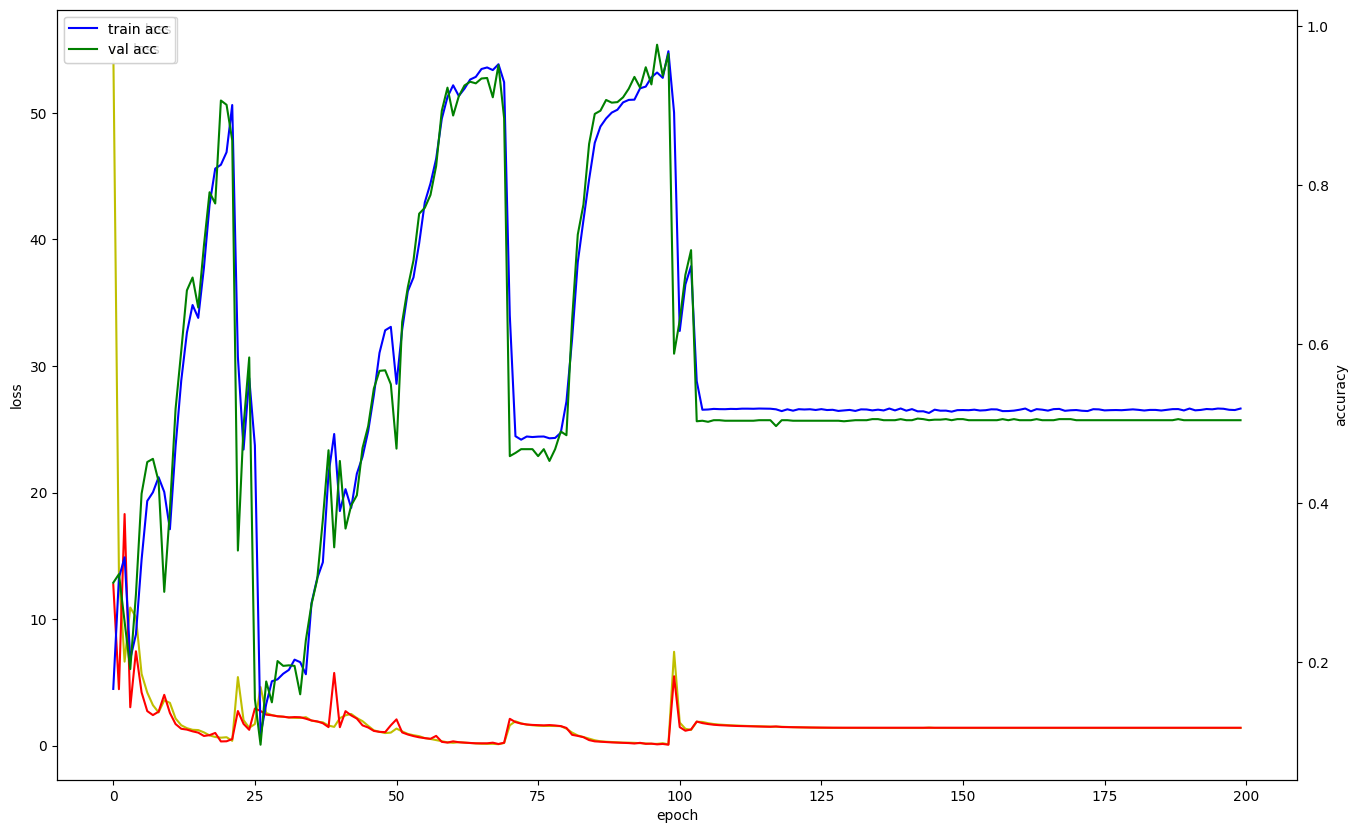

In [30]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.savefig(f'../readme_img/data_{check_data_version}_train_{version}.png')
plt.show()

In [31]:

from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model


model = load_model(f'../models/data_{check_data_version}_train_{version}_model.h5')

y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

47/47 [==============================] - 0s 3ms/step


array([[[1440,    0],
        [   0,   42]],

       [[1430,    0],
        [   0,   52]],

       [[1418,    9],
        [   0,   55]],

       [[1425,    0],
        [   0,   57]],

       [[1421,    3],
        [  11,   47]],

       [[1435,    0],
        [   0,   47]],

       [[1431,   10],
        [   0,   41]],

       [[1432,    0],
        [   0,   50]],

       [[1428,    0],
        [   0,   54]],

       [[1427,    0],
        [   0,   55]],

       [[1422,    0],
        [   0,   60]],

       [[1437,    0],
        [   0,   45]],

       [[1438,    0],
        [   0,   44]],

       [[1427,    0],
        [   0,   55]],

       [[1439,    0],
        [   3,   40]],

       [[1426,    0],
        [   0,   56]],

       [[1425,    0],
        [  10,   47]],

       [[1447,    0],
        [   0,   35]],

       [[1426,    0],
        [   0,   56]],

       [[1427,    0],
        [   0,   55]],

       [[1434,    0],
        [   0,   48]],

       [[1430,    0],
        [   